# 1-3,ÊñáÊú¨Êï∞ÊçÆÂª∫Ê®°ÊµÅÁ®ãËåÉ‰æã

In [ ]:
import os

#macÁ≥ªÁªü‰∏äpytorchÂíåmatplotlibÂú®jupyter‰∏≠ÂêåÊó∂Ë∑ëÈúÄË¶ÅÊõ¥ÊîπÁéØÂ¢ÉÂèòÈáè
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 


In [ ]:
!pip install gensim 
!pip install torchkeras

In [15]:
import torch 
import gensim
import torchkeras 
print("torch.__version__ = ", torch.__version__)
print("gensim.__version__ = ", gensim.__version__) 
print("torchkeras.__version__ = ", torchkeras.__version__) 


torch.__version__ =  2.0.1
gensim.__version__ =  4.3.1
torchkeras.__version__ =  3.9.3


<br>

<font color="red">
 
ÂÖ¨‰ºóÂè∑ **ÁÆóÊ≥ïÁæéÈ£üÂ±ã** ÂõûÂ§çÂÖ≥ÈîÆËØçÔºö**pytorch**Ôºå Ëé∑ÂèñÊú¨È°πÁõÆÊ∫êÁ†ÅÂíåÊâÄÁî®Êï∞ÊçÆÈõÜÁôæÂ∫¶‰∫ëÁõò‰∏ãËΩΩÈìæÊé•„ÄÇ
    
</font> 


### ‰∏ÄÔºåÂáÜÂ§áÊï∞ÊçÆ

imdbÊï∞ÊçÆÈõÜÁöÑÁõÆÊ†áÊòØÊ†πÊçÆÁîµÂΩ±ËØÑËÆ∫ÁöÑÊñáÊú¨ÂÜÖÂÆπÈ¢ÑÊµãËØÑËÆ∫ÁöÑÊÉÖÊÑüÊ†áÁ≠æ„ÄÇ

ËÆ≠ÁªÉÈõÜÊúâ20000Êù°ÁîµÂΩ±ËØÑËÆ∫ÊñáÊú¨ÔºåÊµãËØïÈõÜÊúâ5000Êù°ÁîµÂΩ±ËØÑËÆ∫ÊñáÊú¨ÔºåÂÖ∂‰∏≠Ê≠£Èù¢ËØÑËÆ∫ÂíåË¥üÈù¢ËØÑËÆ∫ÈÉΩÂêÑÂç†‰∏ÄÂçä„ÄÇ

ÊñáÊú¨Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜËæÉ‰∏∫ÁπÅÁêêÔºåÂåÖÊã¨ÊñáÊú¨ÂàáËØçÔºåÊûÑÂª∫ËØçÂÖ∏ÔºåÁºñÁ†ÅËΩ¨Êç¢ÔºåÂ∫èÂàóÂ°´ÂÖÖÔºåÊûÑÂª∫Êï∞ÊçÆÁÆ°ÈÅìÁ≠âÁ≠â„ÄÇ


Ê≠§Â§Ñ‰ΩøÁî®gensim‰∏≠ÁöÑËØçÂÖ∏Â∑•ÂÖ∑Âπ∂Ëá™ÂÆö‰πâDataset„ÄÇ

‰∏ãÈù¢ËøõË°åÊºîÁ§∫„ÄÇ


![](./data/ÁîµÂΩ±ËØÑËÆ∫.jpg)

In [92]:
import numpy as np 
import pandas as pd 
import torch 

MAX_LEN = 200           #ÊØè‰∏™Ê†∑Êú¨‰øùÁïô200‰∏™ËØçÁöÑÈïøÂ∫¶
BATCH_SIZE = 20 


dftrain = pd.read_csv("./eat_pytorch_datasets/imdb/train.tsv",sep="\t",header = None,names = ["label","text"])
dfval = pd.read_csv("./eat_pytorch_datasets/imdb/test.tsv",sep="\t",header = None,names = ["label","text"])

In [106]:
from gensim import corpora
import string

#1ÔºåÊñáÊú¨ÂàáËØç
def textsplit(text):
    translator = str.maketrans('', '', string.punctuation)
    words = text.translate(translator).split(' ')
    return words
        
#2ÔºåÊûÑÂª∫ËØçÂÖ∏
vocab = corpora.Dictionary((textsplit(text) for text in dftrain['text']))
vocab.filter_extremes(no_below=5,no_above=5000)
special_tokens = {'<pad>': 0, '<unk>': 1}
vocab.patch_with_special_tokens(special_tokens)
vocab_size = len(vocab.token2id) 
print('vocab_size = ',vocab_size)

#3ÔºåÂ∫èÂàóÂ°´ÂÖÖ
def pad(seq,max_length,pad_value=0):
    n = len(seq)
    result = seq+[pad_value]*max_length
    return result[:max_length]


#4ÔºåÁºñÁ†ÅËΩ¨Êç¢
def text_pipeline(text):
    tokens = vocab.doc2idx(textsplit(text))
    tokens = [x if x>0 else special_tokens['<unk>']  for x in tokens ]
    result = pad(tokens,MAX_LEN,special_tokens['<pad>'])
    return result 

print(text_pipeline("this is an example!")) 


vocab_size =  29924
[145, 77, 569, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [107]:
#5ÔºåÊûÑÂª∫ÁÆ°ÈÅì
from torch.utils.data import Dataset,DataLoader

class ImdbDataset(Dataset):
    def __init__(self,df):
        self.df = df
    def __len__(self):
        return len(self.df)
    def __getitem__(self,index):
        text = self.df["text"].iloc[index]
        label = torch.tensor([self.df["label"].iloc[index]]).float()
        tokens = torch.tensor(text_pipeline(text)).int() 
        return tokens,label
    
ds_train = ImdbDataset(dftrain)
ds_val = ImdbDataset(dfval)


In [108]:
dl_train = DataLoader(ds_train,batch_size = 50,shuffle = True)
dl_val = DataLoader(ds_val,batch_size = 50,shuffle = False)


In [109]:
for features,labels in dl_train:
    break 

### ‰∫åÔºåÂÆö‰πâÊ®°Âûã

‰ΩøÁî®PytorchÈÄöÂ∏∏Êúâ‰∏âÁßçÊñπÂºèÊûÑÂª∫Ê®°ÂûãÔºö‰ΩøÁî®nn.SequentialÊåâÂ±ÇÈ°∫Â∫èÊûÑÂª∫Ê®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ëá™ÂÆö‰πâÊ®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ê®°ÂûãÂπ∂ËæÖÂä©Â∫îÁî®Ê®°ÂûãÂÆπÂô®(nn.Sequential,nn.ModuleList,nn.ModuleDict)ËøõË°åÂ∞ÅË£Ö„ÄÇ

Ê≠§Â§ÑÈÄâÊã©‰ΩøÁî®Á¨¨‰∏âÁßçÊñπÂºèËøõË°åÊûÑÂª∫„ÄÇ


In [110]:
import torch
from torch import nn 
torch.manual_seed(42)


In [111]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        #ËÆæÁΩÆpadding_idxÂèÇÊï∞ÂêéÂ∞ÜÂú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠Â∞ÜÂ°´ÂÖÖÁöÑtokenÂßãÁªàËµãÂÄº‰∏∫0ÂêëÈáè
        self.embedding = nn.Embedding(num_embeddings = vocab_size,embedding_dim = 3,padding_idx = 0)
        
        self.conv = nn.Sequential()
        self.conv.add_module("conv_1",nn.Conv1d(in_channels = 3,out_channels = 16,kernel_size = 5))
        self.conv.add_module("pool_1",nn.MaxPool1d(kernel_size = 2))
        self.conv.add_module("relu_1",nn.ReLU())
        self.conv.add_module("conv_2",nn.Conv1d(in_channels = 16,out_channels = 128,kernel_size = 2))
        self.conv.add_module("pool_2",nn.MaxPool1d(kernel_size = 2))
        self.conv.add_module("relu_2",nn.ReLU())
        
        self.dense = nn.Sequential()
        self.dense.add_module("flatten",nn.Flatten())
        self.dense.add_module("linear",nn.Linear(6144,1))
        
        
    def forward(self,x):
        x = self.embedding(x).transpose(1,2)
        x = self.conv(x)
        y = self.dense(x)
        return y
        
net = Net() 
print(net)

Net(
  (embedding): Embedding(29924, 3, padding_idx=0)
  (conv): Sequential(
    (conv_1): Conv1d(3, 16, kernel_size=(5,), stride=(1,))
    (pool_1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (relu_1): ReLU()
    (conv_2): Conv1d(16, 128, kernel_size=(2,), stride=(1,))
    (pool_2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (relu_2): ReLU()
  )
  (dense): Sequential(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear): Linear(in_features=6144, out_features=1, bias=True)
  )
)


```
Net(
  (embedding): Embedding(8813, 3, padding_idx=0)
  (conv): Sequential(
    (conv_1): Conv1d(3, 16, kernel_size=(5,), stride=(1,))
    (pool_1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (relu_1): ReLU()
    (conv_2): Conv1d(16, 128, kernel_size=(2,), stride=(1,))
    (pool_2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (relu_2): ReLU()
  )
  (dense): Sequential(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear): Linear(in_features=6144, out_features=1, bias=True)
  )
)
```

In [112]:
from torchkeras import summary 
summary(net,input_data=features);


--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
Embedding-1                             [-1, 200, 3]               89,772
Conv1d-2                               [-1, 16, 196]                  256
MaxPool1d-3                             [-1, 16, 98]                    0
ReLU-4                                  [-1, 16, 98]                    0
Conv1d-5                               [-1, 128, 97]                4,224
MaxPool1d-6                            [-1, 128, 48]                    0
ReLU-7                                 [-1, 128, 48]                    0
Flatten-8                                 [-1, 6144]                    0
Linear-9                                     [-1, 1]                6,145
Total params: 100,397
Trainable params: 100,397
Non-trainable params: 0
--------------------------------------------------------------------------
Input size (MB): 0.000069
Forward/back

### ‰∏âÔºåËÆ≠ÁªÉÊ®°Âûã

ËÆ≠ÁªÉPytorchÈÄöÂ∏∏ÈúÄË¶ÅÁî®Êà∑ÁºñÂÜôËá™ÂÆö‰πâËÆ≠ÁªÉÂæ™ÁéØÔºåËÆ≠ÁªÉÂæ™ÁéØÁöÑ‰ª£Á†ÅÈ£éÊ†ºÂõ†‰∫∫ËÄåÂºÇ„ÄÇ

Êúâ3Á±ªÂÖ∏ÂûãÁöÑËÆ≠ÁªÉÂæ™ÁéØ‰ª£Á†ÅÈ£éÊ†ºÔºöËÑöÊú¨ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÂáΩÊï∞ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÁ±ªÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ

Ê≠§Â§Ñ‰ªãÁªç‰∏ÄÁßçËæÉÈÄöÁî®ÁöÑ‰ªøÁÖßKerasÈ£éÊ†ºÁöÑÁ±ªÂΩ¢ÂºèÁöÑËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ

ËØ•ËÆ≠ÁªÉÂæ™ÁéØÁöÑ‰ª£Á†Å‰πüÊòØtorchkerasÂ∫ìÁöÑÊ†∏ÂøÉ‰ª£Á†Å„ÄÇ

torchkerasËØ¶ÊÉÖ:  https://github.com/lyhue1991/torchkeras 



In [113]:
import os,sys,time
import numpy as np
import pandas as pd
import datetime 
from tqdm import tqdm 

import torch
from torch import nn 
from copy import deepcopy

def printlog(info):
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
    print(str(info)+"\n")

class StepRunner:
    def __init__(self, net, loss_fn,stage = "train", metrics_dict = None, 
                 optimizer = None, lr_scheduler = None
                 ):
        self.net,self.loss_fn,self.metrics_dict,self.stage = net,loss_fn,metrics_dict,stage
        self.optimizer,self.lr_scheduler = optimizer,lr_scheduler
    
    def __call__(self, features, labels):
        #loss
        preds = self.net(features)
        loss = self.loss_fn(preds,labels)

        #backward()
        if self.optimizer is not None and self.stage=="train":
            loss.backward()
            self.optimizer.step()
            if self.lr_scheduler is not None:
                self.lr_scheduler.step()
            self.optimizer.zero_grad()
            
        #metrics
        step_metrics = {self.stage+"_"+name:metric_fn(preds, labels).item() 
                        for name,metric_fn in self.metrics_dict.items()}
        return loss.item(),step_metrics


class EpochRunner:
    def __init__(self,steprunner):
        self.steprunner = steprunner
        self.stage = steprunner.stage
        self.steprunner.net.train() if self.stage=="train" else self.steprunner.net.eval()
        
    def __call__(self,dataloader):
        total_loss,step = 0,0
        loop = tqdm(enumerate(dataloader), total =len(dataloader))
        for i, batch in loop: 
            if self.stage=="train":
                loss, step_metrics = self.steprunner(*batch)
            else:
                with torch.no_grad():
                    loss, step_metrics = self.steprunner(*batch)
            step_log = dict({self.stage+"_loss":loss},**step_metrics)

            total_loss += loss
            step+=1
            if i!=len(dataloader)-1:
                loop.set_postfix(**step_log)
            else:
                epoch_loss = total_loss/step
                epoch_metrics = {self.stage+"_"+name:metric_fn.compute().item() 
                                 for name,metric_fn in self.steprunner.metrics_dict.items()}
                epoch_log = dict({self.stage+"_loss":epoch_loss},**epoch_metrics)
                loop.set_postfix(**epoch_log)

                for name,metric_fn in self.steprunner.metrics_dict.items():
                    metric_fn.reset()
        return epoch_log

class KerasModel(torch.nn.Module):
    def __init__(self,net,loss_fn,metrics_dict=None,optimizer=None,lr_scheduler = None):
        super().__init__()
        self.history = {}
        
        self.net = net
        self.loss_fn = loss_fn
        self.metrics_dict = nn.ModuleDict(metrics_dict) 
        
        self.optimizer = optimizer if optimizer is not None else torch.optim.Adam(
            self.parameters(), lr=1e-2)
        self.lr_scheduler = lr_scheduler

    def forward(self, x):
        if self.net:
            return self.net.forward(x)
        else:
            raise NotImplementedError


    def fit(self, train_data, val_data=None, epochs=10, ckpt_path='checkpoint.pt', 
            patience=5, monitor="val_loss", mode="min"):

        for epoch in range(1, epochs+1):
            printlog("Epoch {0} / {1}".format(epoch, epochs))
            
            # 1Ôºåtrain -------------------------------------------------  
            train_step_runner = StepRunner(net = self.net,stage="train",
                    loss_fn = self.loss_fn,metrics_dict=deepcopy(self.metrics_dict),
                    optimizer = self.optimizer, lr_scheduler = self.lr_scheduler)
            train_epoch_runner = EpochRunner(train_step_runner)
            train_metrics = train_epoch_runner(train_data)
            
            for name, metric in train_metrics.items():
                self.history[name] = self.history.get(name, []) + [metric]

            # 2Ôºåvalidate -------------------------------------------------
            if val_data:
                val_step_runner = StepRunner(net = self.net,stage="val",
                    loss_fn = self.loss_fn,metrics_dict=deepcopy(self.metrics_dict))
                val_epoch_runner = EpochRunner(val_step_runner)
                with torch.no_grad():
                    val_metrics = val_epoch_runner(val_data)
                val_metrics["epoch"] = epoch
                for name, metric in val_metrics.items():
                    self.history[name] = self.history.get(name, []) + [metric]
            
            # 3Ôºåearly-stopping -------------------------------------------------
            if not val_data:
                continue
            arr_scores = self.history[monitor]
            best_score_idx = np.argmax(arr_scores) if mode=="max" else np.argmin(arr_scores)
            if best_score_idx==len(arr_scores)-1:
                torch.save(self.net.state_dict(),ckpt_path)
                print("<<<<<< reach best {0} : {1} >>>>>>".format(monitor,
                     arr_scores[best_score_idx]),file=sys.stderr)
            if len(arr_scores)-best_score_idx>patience:
                print("<<<<<< {} without improvement in {} epoch, early stopping >>>>>>".format(
                    monitor,patience),file=sys.stderr)
                break 
                
        self.net.load_state_dict(torch.load(ckpt_path))  
        return pd.DataFrame(self.history)

    @torch.no_grad()
    def evaluate(self, val_data):
        val_step_runner = StepRunner(net = self.net,stage="val",
                    loss_fn = self.loss_fn,metrics_dict=deepcopy(self.metrics_dict))
        val_epoch_runner = EpochRunner(val_step_runner)
        val_metrics = val_epoch_runner(val_data)
        return val_metrics
        
       
    @torch.no_grad()
    def predict(self, dataloader):
        self.net.eval()
        result = torch.cat([self.forward(t[0]) for t in dataloader])
        return result.data


In [115]:
from torchmetrics import Accuracy

net = Net() 
model = KerasModel(net,
                  loss_fn = nn.BCEWithLogitsLoss(),
                  optimizer= torch.optim.Adam(net.parameters(),lr = 0.01),  
                  metrics_dict = {"acc":Accuracy(task='binary')}
                )


In [116]:
model.fit(dl_train,
    val_data=dl_val,
    epochs=10,
    ckpt_path='checkpoint',
    patience=3,
    monitor='val_acc',
    mode='max')



================================================================================2023-08-02 14:20:21
Epoch 1 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 51.21it/s, val_acc=0.518, val_loss=0.693]
<<<<<< reach best val_acc : 0.5180000066757202 >>>>>>



================================================================================2023-08-02 14:20:33
Epoch 2 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 54.22it/s, val_acc=0.58, val_loss=0.689]
<<<<<< reach best val_acc : 0.5803999900817871 >>>>>>



================================================================================2023-08-02 14:20:45
Epoch 3 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 53.84it/s, val_acc=0.781, val_loss=0.47]
<<<<<< reach best val_acc : 0.7807999849319458 >>>>>>



================================================================================2023-08-02 14:20:57
Epoch 4 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 54.18it/s, val_acc=0.819, val_loss=0.408]
<<<<<< reach best val_acc : 0.8194000124931335 >>>>>>



================================================================================2023-08-02 14:21:09
Epoch 5 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 55.69it/s, val_acc=0.836, val_loss=0.395]
<<<<<< reach best val_acc : 0.8357999920845032 >>>>>>



================================================================================2023-08-02 14:21:21
Epoch 6 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 50.93it/s, val_acc=0.828, val_loss=0.456]



================================================================================2023-08-02 14:21:33
Epoch 7 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 55.26it/s, val_acc=0.829, val_loss=0.558]



================================================================================2023-08-02 14:21:44
Epoch 8 / 10



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 52.91it/s, val_acc=0.823, val_loss=0.67]
<<<<<< val_acc without improvement in 3 epoch, early stopping >>>>>>


train_loss  train_acc  val_loss  val_acc  epoch
0    0.701064    0.49580  0.693045   0.5180      1
1    0.693060    0.50335  0.688656   0.5804      2
2    0.579867    0.69010  0.469574   0.7808      3
3    0.385625    0.82990  0.407633   0.8194      4
4    0.261653    0.89260  0.394901   0.8358      5
5    0.175921    0.93210  0.455604   0.8284      6
6    0.119178    0.95610  0.558430   0.8286      7
7    0.075409    0.97330  0.670172   0.8232      8

### ÂõõÔºåËØÑ‰º∞Ê®°Âûã

In [117]:
import pandas as pd 

history = model.history
dfhistory = pd.DataFrame(history) 
dfhistory 


train_loss  train_acc  val_loss  val_acc  epoch
0    0.701064    0.49580  0.693045   0.5180      1
1    0.693060    0.50335  0.688656   0.5804      2
2    0.579867    0.69010  0.469574   0.7808      3
3    0.385625    0.82990  0.407633   0.8194      4
4    0.261653    0.89260  0.394901   0.8358      5
5    0.175921    0.93210  0.455604   0.8284      6
6    0.119178    0.95610  0.558430   0.8286      7
7    0.075409    0.97330  0.670172   0.8232      8

In [118]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory["train_"+metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

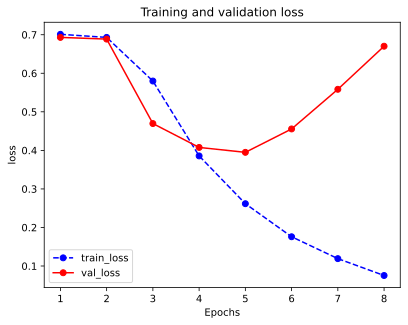

In [119]:
plot_metric(dfhistory,"loss")

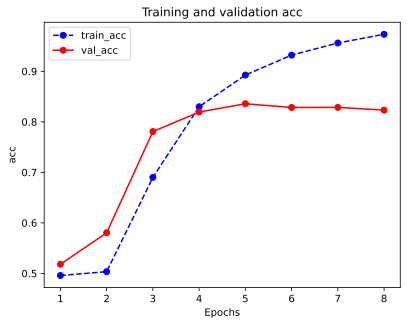

In [120]:
plot_metric(dfhistory,"acc")

In [121]:
# ËØÑ‰º∞
model.evaluate(dl_val)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 50.26it/s, val_acc=0.836, val_loss=0.395]


{'val_loss': 0.39490113019943235, 'val_acc': 0.8357999920845032}

### ‰∫îÔºå‰ΩøÁî®Ê®°Âûã

In [122]:
def predict(net,dl):
    net.eval()
    with torch.no_grad():
        result = nn.Sigmoid()(torch.cat([net.forward(t[0]) for t in dl]))
    return(result.data)


In [123]:
y_pred_probs = predict(net,dl_val)
y_pred_probs

tensor([[0.9372],
        [1.0000],
        [0.8672],
        ...,
        [0.5141],
        [0.4756],
        [0.9998]])

### ÂÖ≠Ôºå‰øùÂ≠òÊ®°Âûã

In [124]:
#Ê®°ÂûãÊùÉÈáçÂ∑≤ÁªèË¢´‰øùÂ≠òÂú®‰∫Ückpt_path='checkpoint.'
net_clone = Net()
net_clone.load_state_dict(torch.load('checkpoint'))


<All keys matched successfully>

**Â¶ÇÊûúÊú¨‰π¶ÂØπ‰Ω†ÊúâÊâÄÂ∏ÆÂä©ÔºåÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÔºåËÆ∞ÂæóÁªôÊú¨È°πÁõÆÂä†‰∏ÄÈ¢óÊòüÊòüstar‚≠êÔ∏èÔºåÂπ∂ÂàÜ‰∫´Áªô‰Ω†ÁöÑÊúãÂèã‰ª¨Âñîüòä!** 

Â¶ÇÊûúÂØπÊú¨‰π¶ÂÜÖÂÆπÁêÜËß£‰∏äÊúâÈúÄË¶ÅËøõ‰∏ÄÊ≠•Âíå‰ΩúËÄÖ‰∫§ÊµÅÁöÑÂú∞ÊñπÔºåÊ¨¢ËøéÂú®ÂÖ¨‰ºóÂè∑"ÁÆóÊ≥ïÁæéÈ£üÂ±ã"‰∏ãÁïôË®Ä„ÄÇ‰ΩúËÄÖÊó∂Èó¥ÂíåÁ≤æÂäõÊúâÈôêÔºå‰ºöÈÖåÊÉÖ‰∫à‰ª•ÂõûÂ§ç„ÄÇ

‰πüÂèØ‰ª•Âú®ÂÖ¨‰ºóÂè∑ÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆÂ≠óÔºö**Âä†Áæ§**ÔºåÂä†ÂÖ•ËØªËÄÖ‰∫§ÊµÅÁæ§ÂíåÂ§ßÂÆ∂ËÆ®ËÆ∫„ÄÇ

![ÁÆóÊ≥ïÁæéÈ£üÂ±ãlogo.png](https://tva1.sinaimg.cn/large/e6c9d24egy1h41m2zugguj20k00b9q46.jpg)